# Map Geographies

This notebooks demonstrates some of the different geographies
for which we can download shapefiles using the `censusdis.maps.ShapeReader.read_cb_shapefile` 
API.

These shapefiles are generally very useful for plotting. For 
even higher resolution shapefiles more suited for tasks like
spatially joining data, the `censusdis.maps.ShapeReader.read_shapefile` 
API is available.

## Imports and configuration

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)

In [2]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt

from typing import Iterable, Optional

from censusdis.states import STATE_NJ, STATE_AK, STATE_HI, ALL_STATES_AND_DC
from censusdis.maps import ShapeReader, plot_us_boundary
import censusdis.maps as cmap

In [3]:
SHAPEFILE_ROOT = os.path.join(os.environ["HOME"], "data", "shapefiles")

# Make sure it is there.
if not os.path.isdir(SHAPEFILE_ROOT):
    os.mkdir(SHAPEFILE_ROOT)

In [4]:
STATE = STATE_NJ
# For small geographies we may want to plot only one county.
COUNTY_ESSEX = "013"
YEAR = 2020

In [5]:
reader = ShapeReader(SHAPEFILE_ROOT, YEAR)

In [6]:
# For plotting the country so we can see where other
# geographies are in reference to states.
gdf_states = reader.read_cb_shapefile("us", "state")
gdf_states = gpd.GeoDataFrame(gdf_states[gdf_states.STATEFP.isin(ALL_STATES_AND_DC)])

In [7]:
def plot(gdf, geo: str, in_geo: str):
    ax = gdf.boundary.plot(linewidth=0.5)

    ax.set_title(f"{YEAR} {geo} in {in_geo}")

    ax.axis("off")


def plot_usa(
    gdf,
    geo: str,
    in_geo: str = "the United States",
    *,
    plot_states: bool = True,
    state_filter: Optional[Iterable[str]] = None,
):
    if "STATEFP" in gdf.columns:
        gdf = gdf[gdf.STATEFP.isin(ALL_STATES_AND_DC)]

    ax = plot_us_boundary(gdf, linewidth=0.5)

    if plot_states:
        if state_filter is not None:
            gdf_plot_states = gdf_states[gdf_states.STATEFP.isin(state_filter)]
        else:
            gdf_plot_states = gdf_states

        ax = plot_us_boundary(gdf_plot_states, ax=ax, edgecolor="black", linewidth=0.5)

    ax.set_title(f"{YEAR} {geo} in {in_geo}")

    ax.axis("off")

# Geographies within the State Level

These are smaller geographies for which we shapefiles
are provided on a state-by-state basis. When we query
them, we have to specify the state we are interested in.

## Block Groups (`geography="bg"`)

In [8]:
gdf = reader.read_cb_shapefile(STATE, "bg")

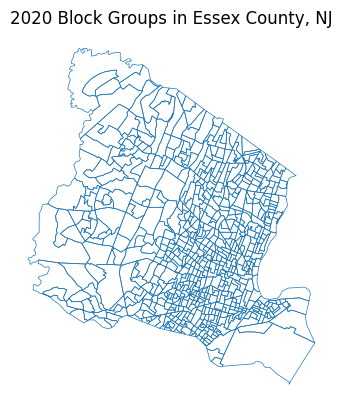

In [9]:
plot(gdf[gdf.COUNTYFP == COUNTY_ESSEX], "Block Groups", "Essex County, NJ")

## Census Tracts (`geography="tract"`)

In [10]:
gdf = reader.read_cb_shapefile(STATE, "tract")

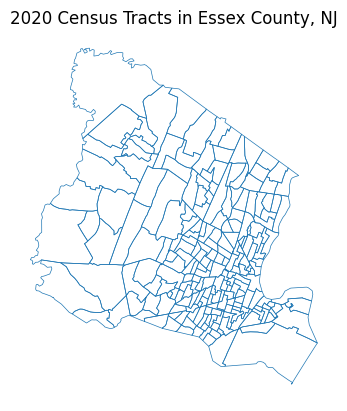

In [11]:
plot(gdf[gdf.COUNTYFP == COUNTY_ESSEX], "Census Tracts", "Essex County, NJ")

## County Subdivisions (`geography="cousub"`)

In [12]:
gdf = reader.read_cb_shapefile(STATE, "cousub")

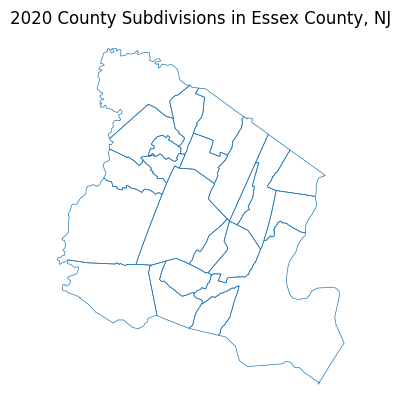

In [13]:
plot(gdf[gdf.COUNTYFP == COUNTY_ESSEX], "County Subdivisions", "Essex County, NJ")

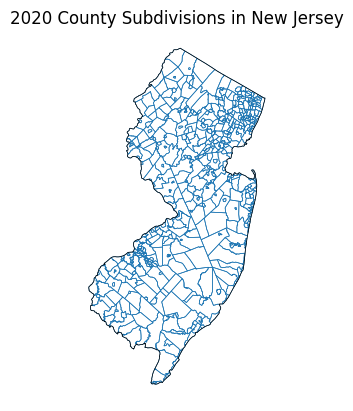

In [14]:
plot_usa(gdf, "County Subdivisions", "New Jersey", state_filter=[STATE_NJ])

## Places (`geography="place"`)

In [15]:
gdf = reader.read_cb_shapefile(STATE, "place")

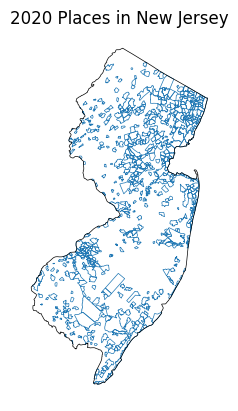

In [16]:
plot_usa(gdf, "Places", "New Jersey", state_filter=[STATE_NJ])

# Sub-State Geographies Queried at the National Level

Each of these geographies is entirely enclosed in a
single state, but there are few enough of them that
they are published in a single shapefile for the whole
country. For these, we specify `"us"` instead of a state 
as the first argument to our query.

## Counties (`geography="county"`)

In [17]:
gdf = reader.read_cb_shapefile("us", "county")

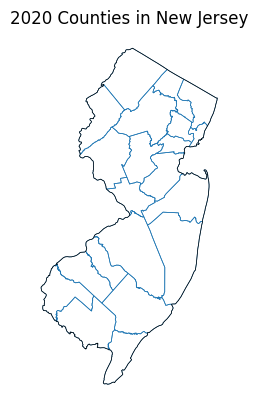

In [18]:
plot_usa(
    gdf[gdf.STATEFP == STATE_NJ], "Counties", "New Jersey", state_filter=[STATE_NJ]
)

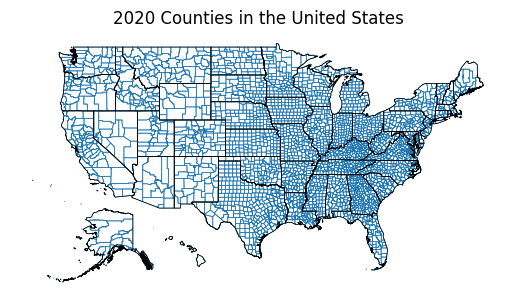

In [19]:
plot_usa(gdf, "Counties")

## States (`geography="state"`)

In [20]:
gdf = reader.read_cb_shapefile("us", "state")

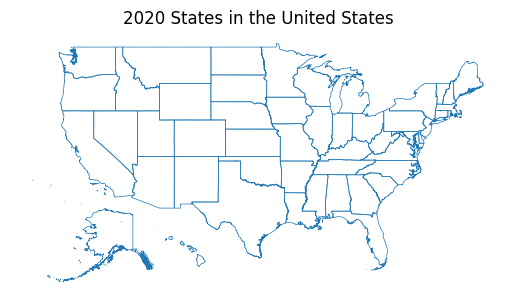

In [21]:
plot_usa(gdf, "States", plot_states=False)

# Top-Level Geographies not Contained in Any State

These geographies are queried at the national level. They do not
belong to any particular state and don't have any column like `STATEFP`
that associates them with a state.

## Metropolitan Statistical Areas / Micropolitan Statistical Areas (`geography="cbsa"`)

In [22]:
gdf = reader.read_cb_shapefile("us", "cbsa")

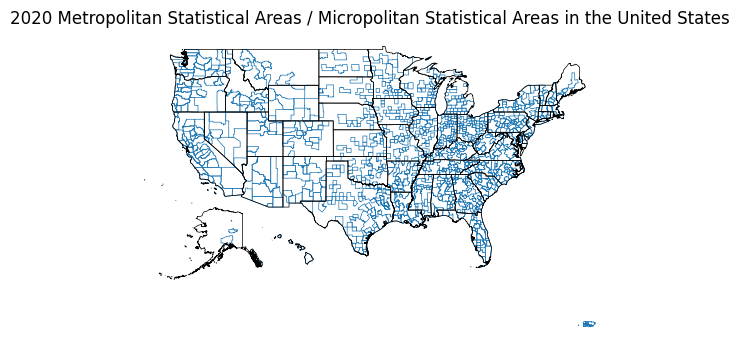

In [23]:
plot_usa(gdf, "Metropolitan Statistical Areas / Micropolitan Statistical Areas")

## Combined Statistical Areas (`geography="csa"`)

In [24]:
gdf = reader.read_cb_shapefile("us", "csa")

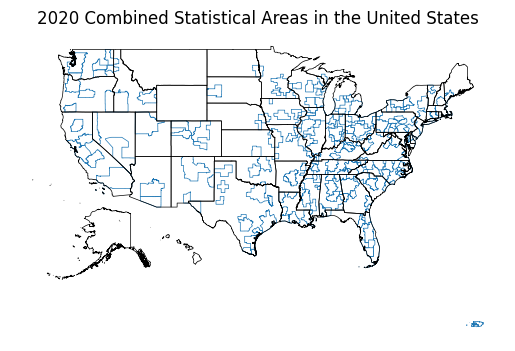

In [25]:
plot_usa(gdf, "Combined Statistical Areas")

## Metropolitan Divisions (`geography="metdiv"`)

In [26]:
gdf = reader.read_cb_shapefile("us", "metdiv")

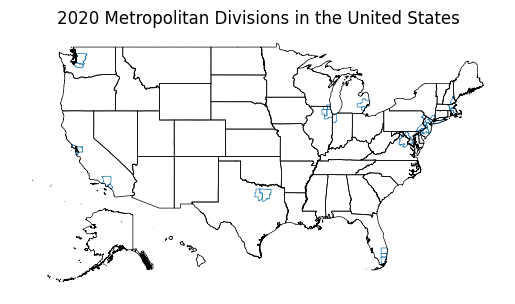

In [27]:
plot_usa(gdf, "Metropolitan Divisions")

## Divisions (`geography="division"`)

In [28]:
gdf = reader.read_cb_shapefile("us", "division")

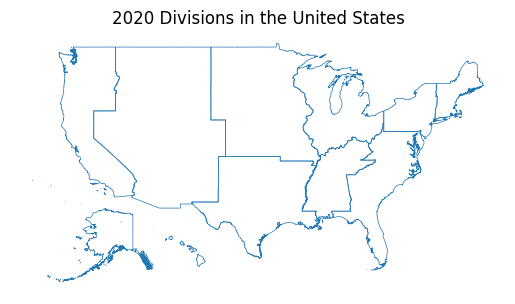

In [29]:
plot_usa(gdf, "Divisions", plot_states=False)

## Regions (`geography="region"`)

In [30]:
gdf = reader.read_cb_shapefile("us", "region")

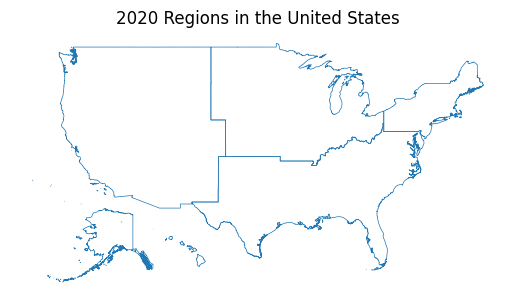

In [31]:
plot_usa(gdf, "Regions", plot_states=False)

## American Indian / Alaska Native / Native Hawaiian Areas (`geography="aiannh"`)

In [32]:
gdf = reader.read_cb_shapefile("us", "aiannh")

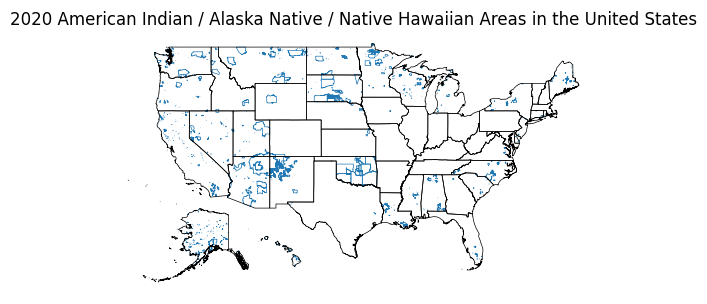

In [33]:
plot_usa(gdf, "American Indian / Alaska Native / Native Hawaiian Areas")

## American Indian Tribal Subdivisions (`geography="aitsn"`)

In [34]:
gdf = reader.read_cb_shapefile("us", "aitsn")

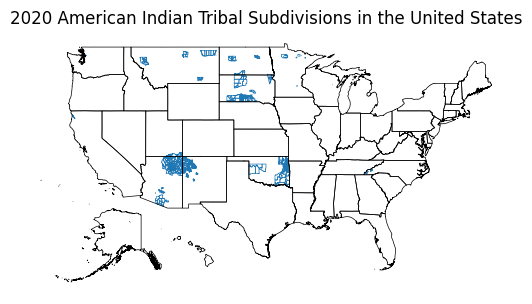

In [35]:
plot_usa(gdf, "American Indian Tribal Subdivisions")

## Alaska Native Regional Corporations ((`geography="anrc"`)

In [36]:
# An atypical naming convention is used here for the first
# arg.
gdf = reader.read_cb_shapefile("02", "anrc")

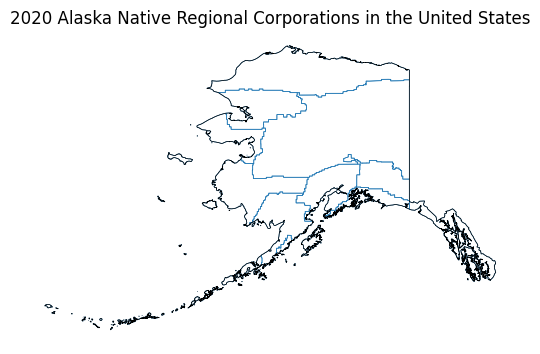

In [37]:
plot_usa(gdf, "Alaska Native Regional Corporations", state_filter=[STATE_AK])

## Tribal Census Tracts (`geography="ttract"`)

In [38]:
gdf = reader.read_cb_shapefile("us", "ttract")

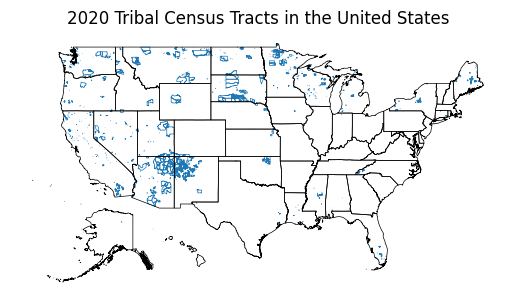

In [39]:
plot_usa(gdf, "Tribal Census Tracts")

## Tribal Block Groups (`geography="tbg"`)

In [40]:
gdf = reader.read_cb_shapefile("us", "tbg")

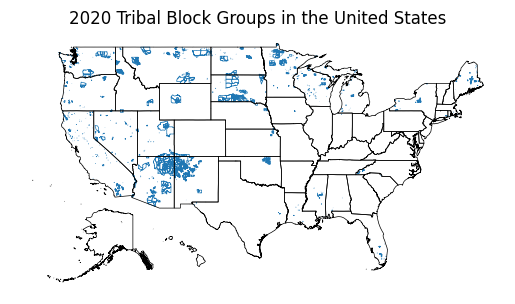

In [41]:
plot_usa(gdf, "Tribal Block Groups")